The Perceptron


The Perceptron is one of the simplest ANN architectures, invented in 1957 by Frank
Rosenblatt. It is based on a slightly different artificial neuron (see Figure 10-4) called a threshold logic unit (TLU), or sometimes a linear threshold unit (LTU): the inputs
and output are now numbers (instead of binary on/off values) and each input con‐
nection is associated with a weight.



The most common step function used in Perceptrons is the Heaviside step function

It computes a linear
combination of the inputs and if the result exceeds a threshold, it outputs the positive
class or else outputs the negative class (just like a Logistic Regression classifier or a
linear SVM). For example, you could use a single TLU to classify iris flowers based on
the petal length and width

A Perceptron is simply composed of a single layer of TLUs,6
 with each TLU connected
to all the inputs. When all the neurons in a layer are connected to every neuron in the
previous layer (i.e., its input neurons), it is called a fully connected layer or a dense
layer

Equation 10-2. Computing the outputs of a fully connected layer
h(W, b)(X)= ϕ(XW + b)

• As always, X represents the matrix of input features. It has one row per instance,
one column per feature.

• The weight matrix W contains all the connection weights except for the ones
from the bias neuron. It has one row per input neuron and one column per artifi‐
cial neuron in the layer.

• The bias vector b contains all the connection weights between the bias neuron
and the artificial neurons. It has one bias term per artificial neuron.

• The function ϕ is called the activation function: 

Equation 10-3. Perceptron learning rule (weight update)

w(i, j)(next step)= wi, j+ η (yj− yj)xi

• wi, j
 is the connection weight between the i
th input neuron and the j
th output neu‐
ron.

• xi
 is the i
th input value of the current training instance.

• yj is the output of the j
th output neuron for the current training instance.

• yj
 is the target output of the j
th output neuron for the current training instance.

• η is the learning rate.

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
iris = load_iris()
X = iris.data[:, (2, 3)] # petal length, petal width
y = (iris.target == 0).astype(np.int) # Iris Setosa?
per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])
y_pred

C:\Users\USER\AppData\Local\Temp\ipykernel_15276\3088752115.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris.target == 0).astype(np.int) # Iris Setosa?


array([0])

Multi-Layer Perceptron and Backpropagation


An MLP is composed of one (passthrough) input layer, one or more layers of TLUs,
called hidden layers, and one final layer of TLUs called the output layer


The signal flows only in one direction (from the inputs to the out‐
puts), so this architecture is an example of a feedforward neural net‐
work (FNN).

When an ANN contains a deep stack of hidden layers8
, it is called a deep neural net‐
work (DNN)

Automatically computing gradients is called automatic dierentia‐
tion, or autodi. There are various autodiff techniques, with differ‐
ent pros and cons. The one used by backpropagation is called
reverse-mode autodi. It is fast and precise, and is well suited when
the function to differentiate has many variables (e.g., connection
weights) and few outputs (e.g., one loss).



1 .It handles one mini-batch at a time (for example containing 32 instances each),
and it goes through the full training set multiple times. Each pass is called an
epoch,

2 .Each mini-batch is passed to the network’s input layer, which just sends it to the
first hidden layer. The algorithm then computes the output of all the neurons in
this layer (for every instance in the mini-batch). The result is passed on to the
next layer, its output is computed and passed to the next layer, and so on until we
get the output of the last layer, the output layer. This is the forward pass: it is
exactly like making predictions, except all intermediate results are preserved
since they are needed for the backward pass



• Next, the algorithm measures the network’s output error (i.e., it uses a loss func‐
tion that compares the desired output and the actual output of the network, and
returns some measure of the error).

• Then it computes how much each output connection contributed to the error.
This is done analytically by simply applying the chain rule (perhaps the most fun‐
damental rule in calculus), which makes this step fast and precise.


• The algorithm then measures how much of these error contributions came from
each connection in the layer below, again using the chain rule—and so on until
the algorithm reaches the input layer. As we explained earlier, this reverse pass
efficiently measures the error gradient across all the connection weights in thenetwork by propagating the error gradient backward through the network (hence
the name of the algorithm).

• Finally, the algorithm performs a Gradient Descent step to tweak all the connec‐
tion weights in the network, using the error gradients it just computed


It is important to initialize all the hidden layers’ connection weights
randomly, or else training will fail. For example, if you initialize all
weights and biases to zero, then all neurons in a given layer will be
perfectly identical, and thus backpropagation will affect them in
exactly the same way, so they will remain identical

The hyperbolic tangent function tanh(z) = 2σ(2z) – 1 :

Just like the logistic function it is S-shaped, continuous, and differentiable, but its
output value ranges from –1 to 1 (instead of 0 to 1 in the case of the logistic func‐
tion), which tends to make each layer’s output more or less centered around 0 at
the beginning of training. This often helps speed up convergence.


The Rectified Linear Unit function: ReLU(z) = max(0, z):
It is continuous but unfortunately not differentiable at z = 0 (the slope changes
abruptly, which can make Gradient Descent bounce around), and its derivative is
0 for z < 0. However, in practice it works very well and has the advantage of being fast to compute11. Most importantly, the fact that it does not have a maximum
output value also helps reduce some issues during Gradient Descent

In general, when building an MLP for regression, you do not want to use any activa‐
tion function for the output neurons, so they are free to output any range of values.
However, if you want to guarantee that the output will always be positive, then you
can use the ReLU activation function, or the soplus activation function in the output
layer

python -c "import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))"

In [7]:
import tensorflow as tf
from tensorflow import keras

In [9]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()


In [10]:
X_train_full.shape

(60000, 28, 28)

In [11]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [12]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]

'Coat'

In [13]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
hidden1=model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

Specifying activation="relu" is equivalent to activa
tion=keras.activations.relu. Other activation functions are
available in the keras.activations package, we will use many of
them in this book. 

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [15]:
 model.layers

In [16]:
model.layers[1].name

'dense'

In [17]:
model.compile(loss="sparse_categorical_crossentropy",
 optimizer="sgd",
 metrics=["accuracy"])

In [18]:
history = model.fit(X_train, y_train, epochs=30,validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 10s 5ms/step - loss: 0.7282 - accuracy: 0.7623 - val_loss: 0.4932 - val_accuracy: 0.8378
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4891 - accuracy: 0.8293 - val_loss: 0.4417 - val_accuracy: 0.8514
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4446 - accuracy: 0.8434 - val_loss: 0.4472 - val_accuracy: 0.8404
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4182 - accuracy: 0.8530 - val_loss: 0.4368 - val_accuracy: 0.8488
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3980 - accuracy: 0.8586 - val_loss: 0.4009 - val_accuracy: 0.8646
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3809 - accuracy: 0.8660 - val_loss: 0.3963 - val_accuracy: 0.8612
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3673 - accuracy: 0.8701 - val_loss: 0.3627 - val_accuracy

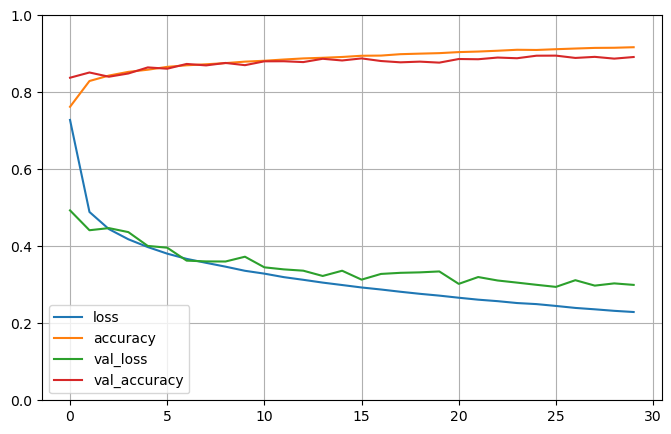

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [22]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 60.9560 - accuracy: 0.8521


[60.95600509643555, 0.8521000146865845]